In [ ]:
import pandas as pd

# Cargar el archivo proporcionado por el usuario
file_path = 'Datos_Resultantes.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas y obtener información básica sobre el dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15562 entries, 0 to 15561
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    15562 non-null  float64
 1   Longitude   15562 non-null  float64
 2   Smin        15562 non-null  float64
 3   Az          15562 non-null  float64
 4   Depth       15562 non-null  float64
 5   ErrDepth    15562 non-null  float64
 6   Nsta        15562 non-null  float64
 7   Gap         15562 non-null  float64
 8   Magnitud    15562 non-null  float64
 9   pca_retemp  15562 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB


(   Latitude  Longitude  Smin    Az  Depth  ErrDepth  Nsta    Gap  Magnitud  \
 0   28.5661   -17.8807  10.4  81.0   21.6      12.7   5.0  189.0       1.6   
 1   28.5584   -17.8508  13.6  67.0   28.2      13.0   4.0  149.0       2.7   
 2   28.5719   -17.8735  10.1  87.0   24.2      14.0   5.0  181.0       1.7   
 3   28.5656   -17.8802  12.1  87.0   24.4      13.7   5.0  189.0       1.7   
 4   28.5499   -17.8549  10.8  90.0   26.3      11.5   5.0  168.0       2.6   
 
    pca_retemp  
 0   -0.125555  
 1   -0.193603  
 2   -0.139373  
 3   -0.135564  
 4   -0.127914  ,
 None)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro

# Estadísticas descriptivas básicas
descriptive_stats = data.describe().T

# Calcular asimetría y curtosis
descriptive_stats['skewness'] = data.apply(skew)
descriptive_stats['kurtosis'] = data.apply(kurtosis)

# Mostrar las estadísticas descriptivas avanzadas
descriptive_stats


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Latitude,15562.0,2.859777e+01,0.072274,28.186000,28.558825,28.568300,28.609100,29.219800,0.823337,3.814220
Longitude,15562.0,-1.783759e+01,0.042316,-18.115400,-17.857800,-17.835700,-17.819100,-17.287200,3.644930,37.914950
Smin,15562.0,6.463739e+00,3.689651,1.400000,3.700000,5.000000,9.100000,30.900000,1.115667,1.053271
Az,15562.0,9.251799e+01,33.767785,0.000000,74.000000,82.000000,95.000000,178.000000,0.814318,-0.193763
Depth,15562.0,1.391158e+01,9.682166,0.000000,7.800000,11.500000,21.500000,91.500000,0.605224,-0.181402
ErrDepth,15562.0,7.978332e+00,4.453136,1.600000,5.100000,6.400000,10.800000,90.800000,3.108500,24.404276
Nsta,15562.0,1.026745e+01,6.411228,3.000000,6.000000,8.000000,13.000000,58.000000,2.558721,9.566110
Gap,15562.0,1.493190e+02,60.268006,49.000000,108.000000,127.000000,183.000000,348.000000,0.926001,0.184226
Magnitud,15562.0,2.043471e+00,0.849507,0.300000,1.300000,1.900000,2.700000,5.100000,0.303926,-0.815737
pca_retemp,15562.0,4.383248e-17,0.516641,-0.481575,-0.212193,-0.141267,-0.070805,3.828934,3.840431,17.209169


In [ ]:
# Identificar valores atípicos usando IQR
outliers_summary = {}

for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_summary[col] = len(outliers)

# Convertir resultados a un DataFrame para visualización
outliers_summary_df = pd.DataFrame(list(outliers_summary.items()), columns=['Variable', 'Outliers'])
outliers_summary_df.sort_values(by='Outliers', ascending=False)


,Variable,Outliers
3,Az,3624
0,Latitude,3315
9,pca_retemp,2138
6,Nsta,595
1,Longitude,582
7,Gap,347
5,ErrDepth,228
2,Smin,126
4,Depth,6
8,Magnitud,5


<ipython-input-5-220ea6b871de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette="viridis")
<ipython-input-5-220ea6b871de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette="viridis")
<ipython-input-5-220ea6b871de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette="viridis")
<ipython-input-5-220ea6b871de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

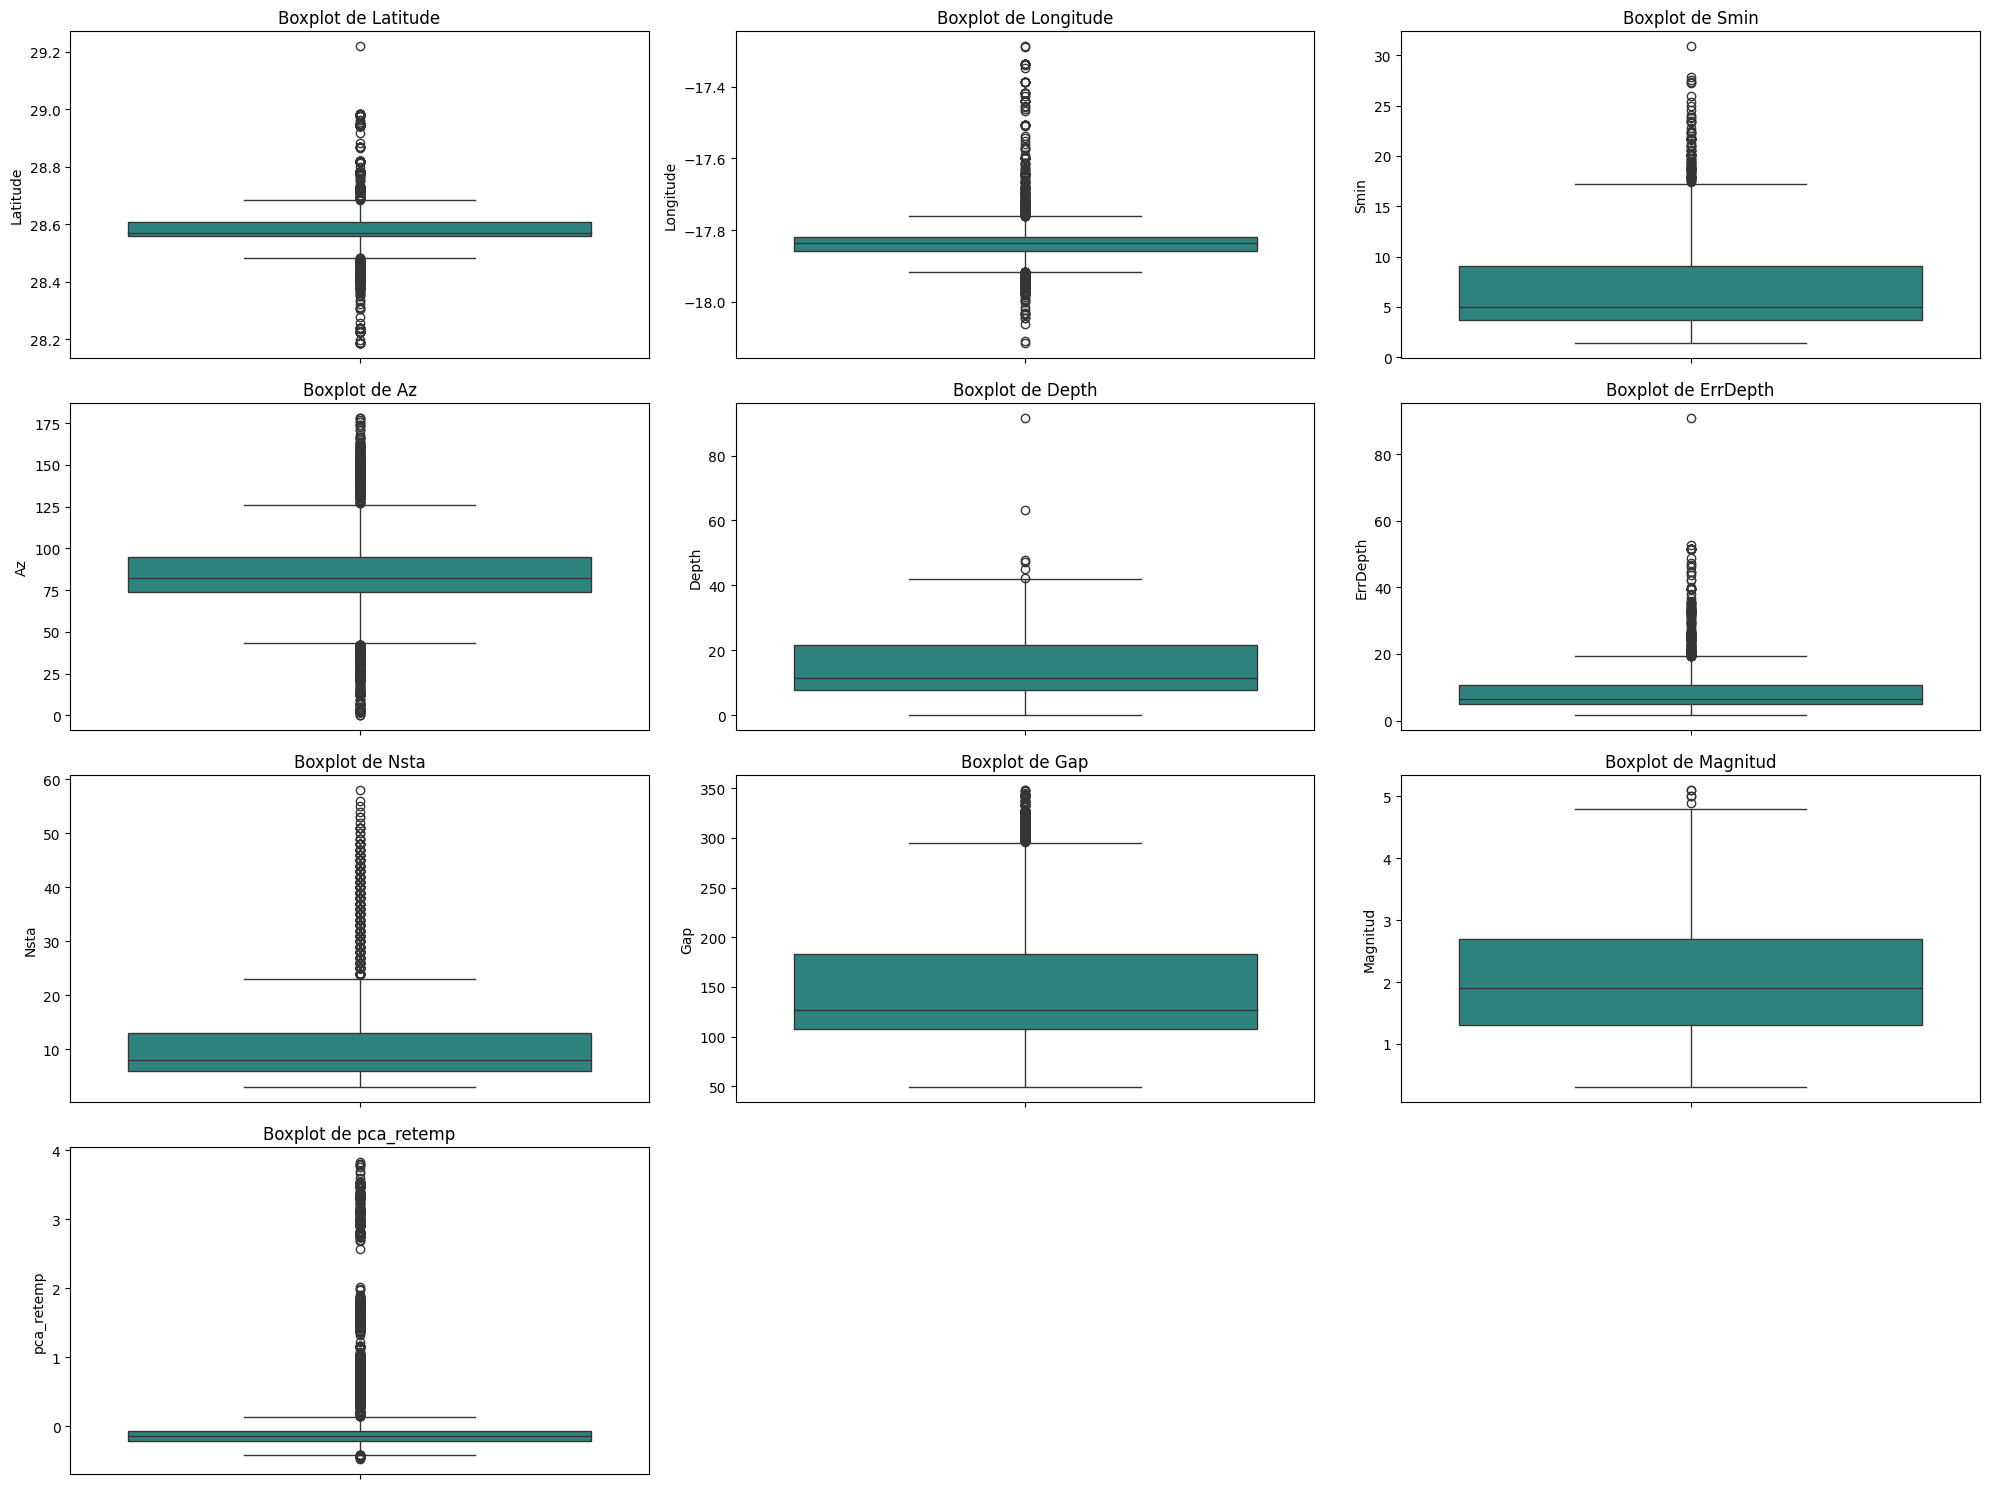

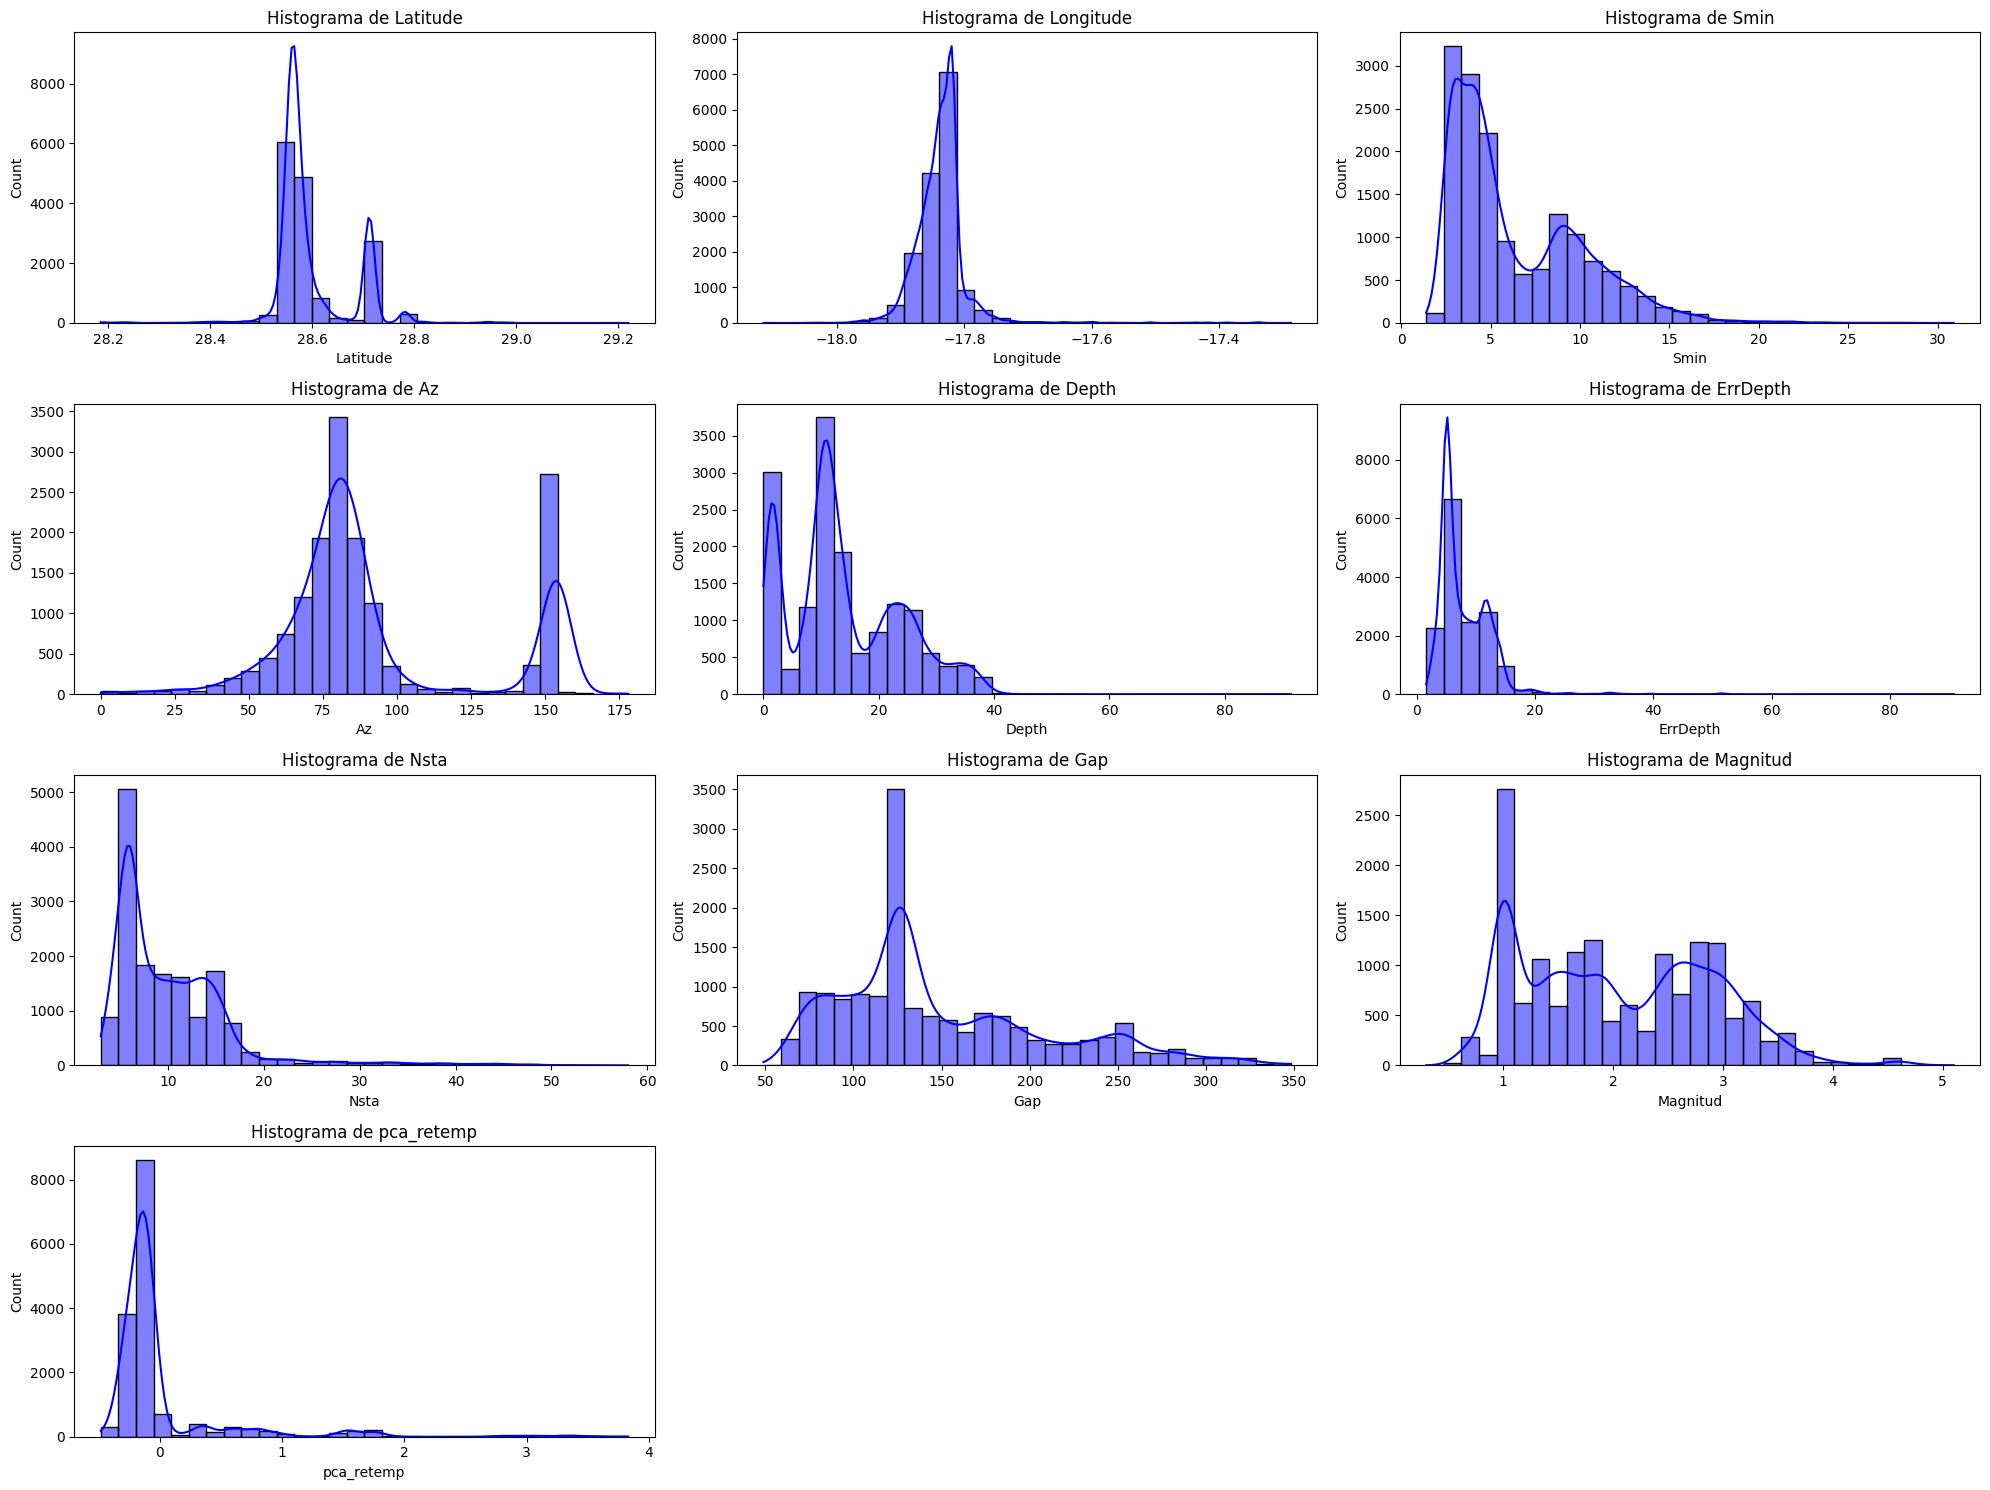

In [ ]:
# Visualización de boxplots para observar valores atípicos
plt.figure(figsize=(20, 15))

for i, col in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[col], palette="viridis")
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

# Histogramas para analizar distribuciones
plt.figure(figsize=(20, 15))

for i, col in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True, color="blue", bins=30)
    plt.title(f"Histograma de {col}", fontsize=12)
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()


Primeras filas del dataset:
   Latitude  Longitude  Smin    Az  Depth  ErrDepth  Nsta    Gap  Magnitud  \
0   28.5661   -17.8807  10.4  81.0   21.6      12.7   5.0  189.0       1.6   
1   28.5584   -17.8508  13.6  67.0   28.2      13.0   4.0  149.0       2.7   
2   28.5719   -17.8735  10.1  87.0   24.2      14.0   5.0  181.0       1.7   
3   28.5656   -17.8802  12.1  87.0   24.4      13.7   5.0  189.0       1.7   
4   28.5499   -17.8549  10.8  90.0   26.3      11.5   5.0  168.0       2.6   

   pca_retemp  
0   -0.125555  
1   -0.193603  
2   -0.139373  
3   -0.135564  
4   -0.127914  

Estadísticas descriptivas avanzadas:
              count          mean        std        min         25%  \
Latitude    15562.0  2.859777e+01   0.072274  28.186000   28.558825   
Longitude   15562.0 -1.783759e+01   0.042316 -18.115400  -17.857800   
Smin        15562.0  6.463739e+00   3.689651   1.400000    3.700000   
Az          15562.0  9.251799e+01  33.767785   0.000000   74.000000   
Depth       15

<ipython-input-6-2ddd5e1115fa>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette="viridis")
<ipython-input-6-2ddd5e1115fa>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette="viridis")
<ipython-input-6-2ddd5e1115fa>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], palette="viridis")
<ipython-input-6-2ddd5e1115fa>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

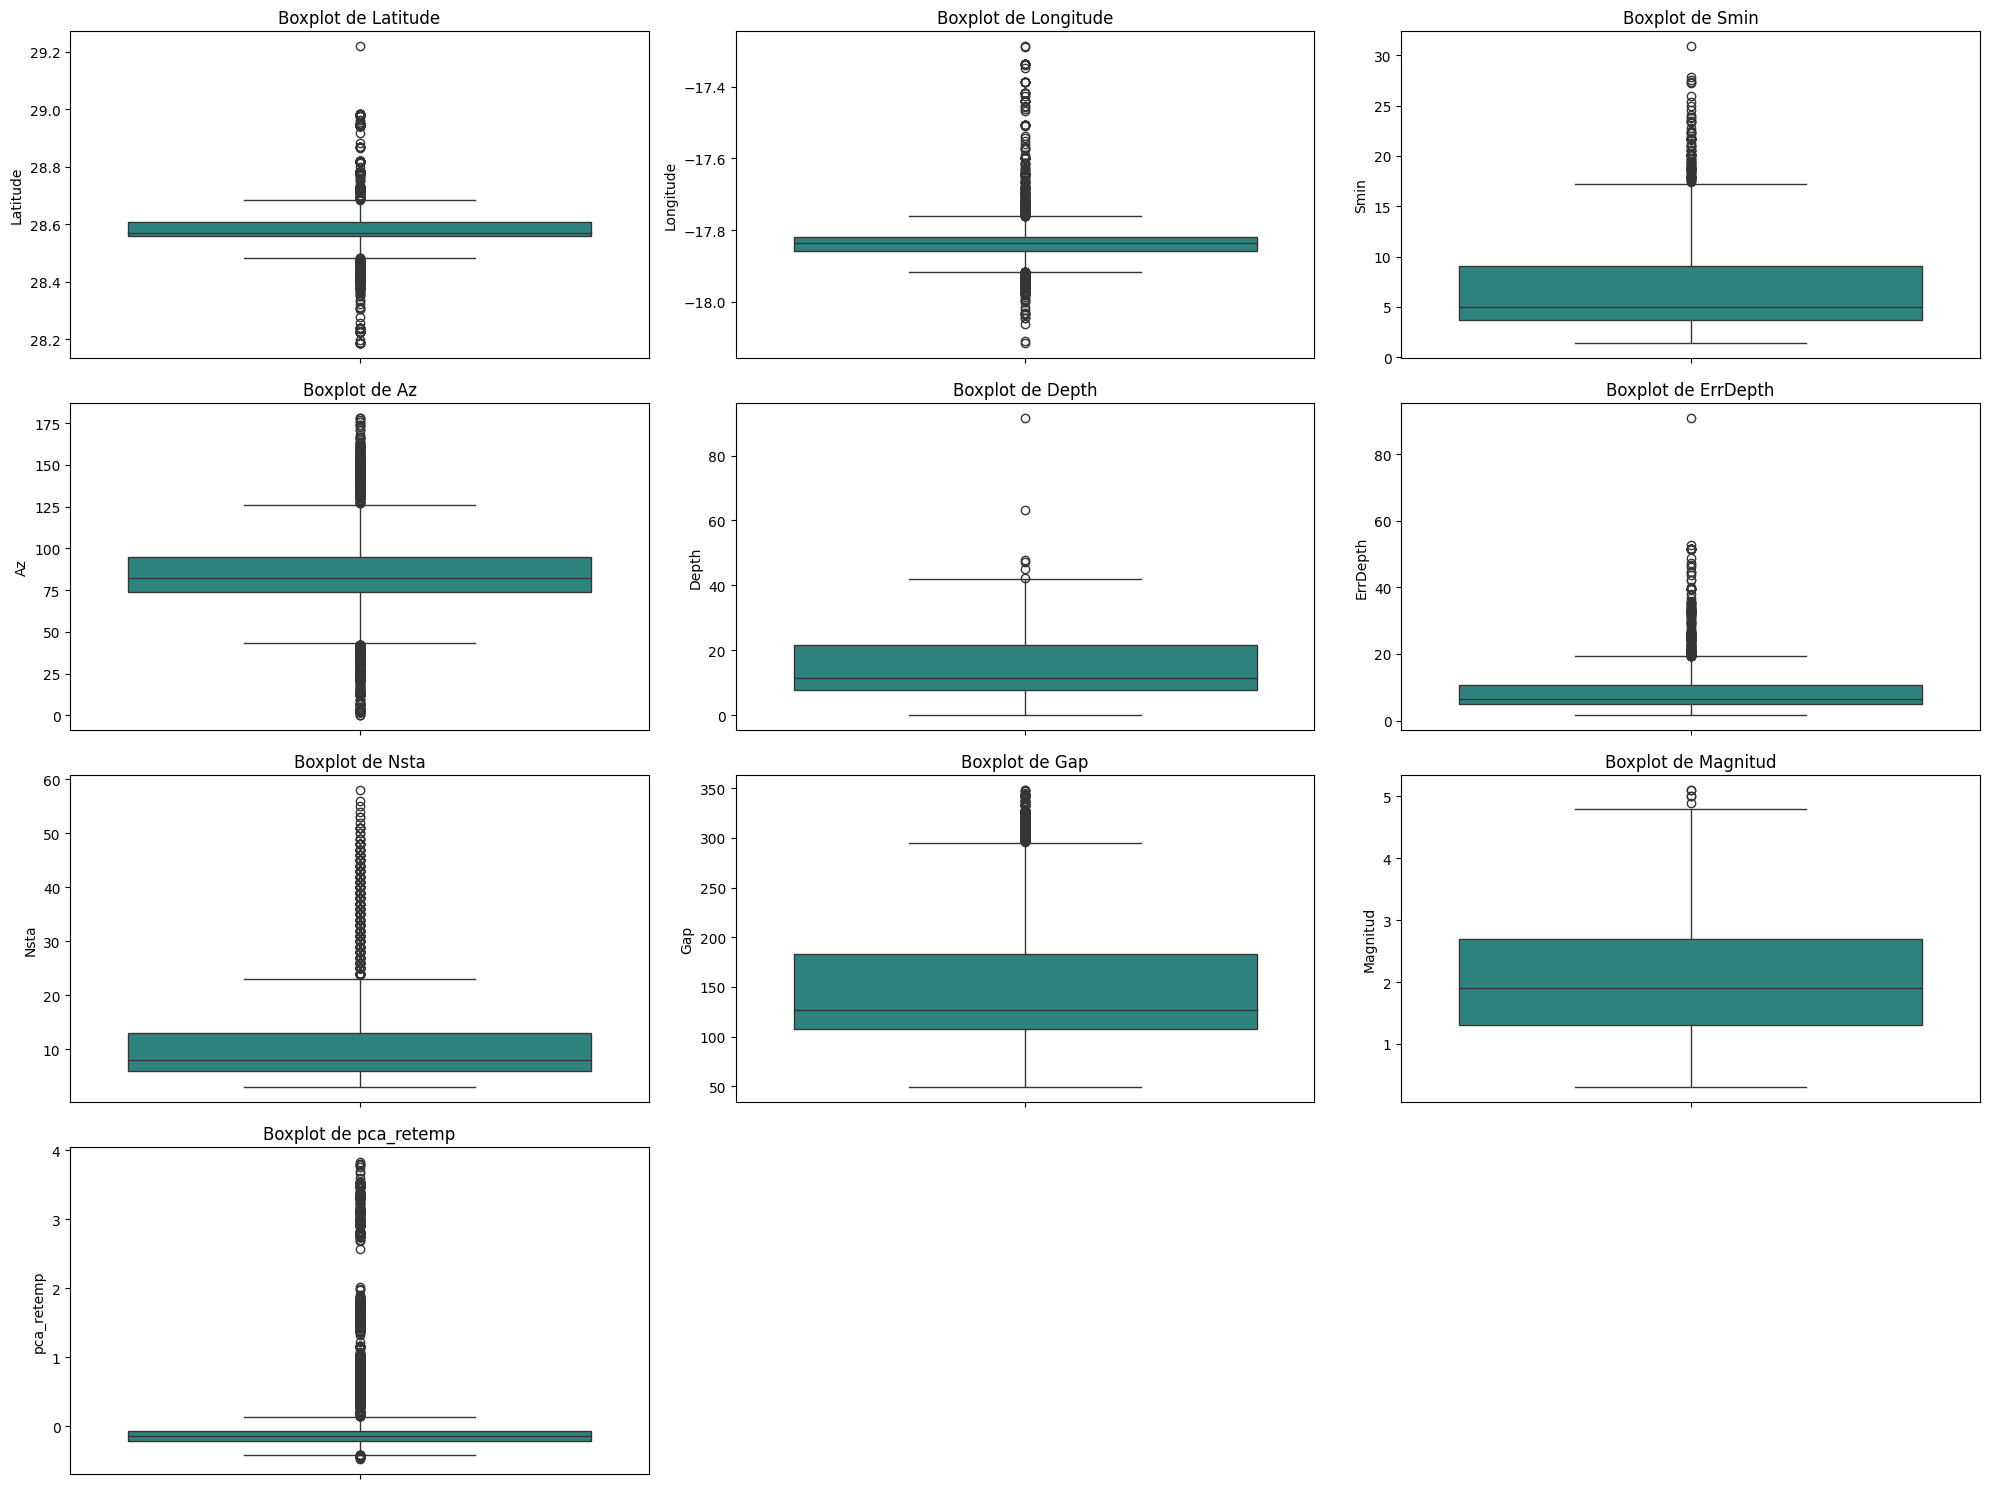

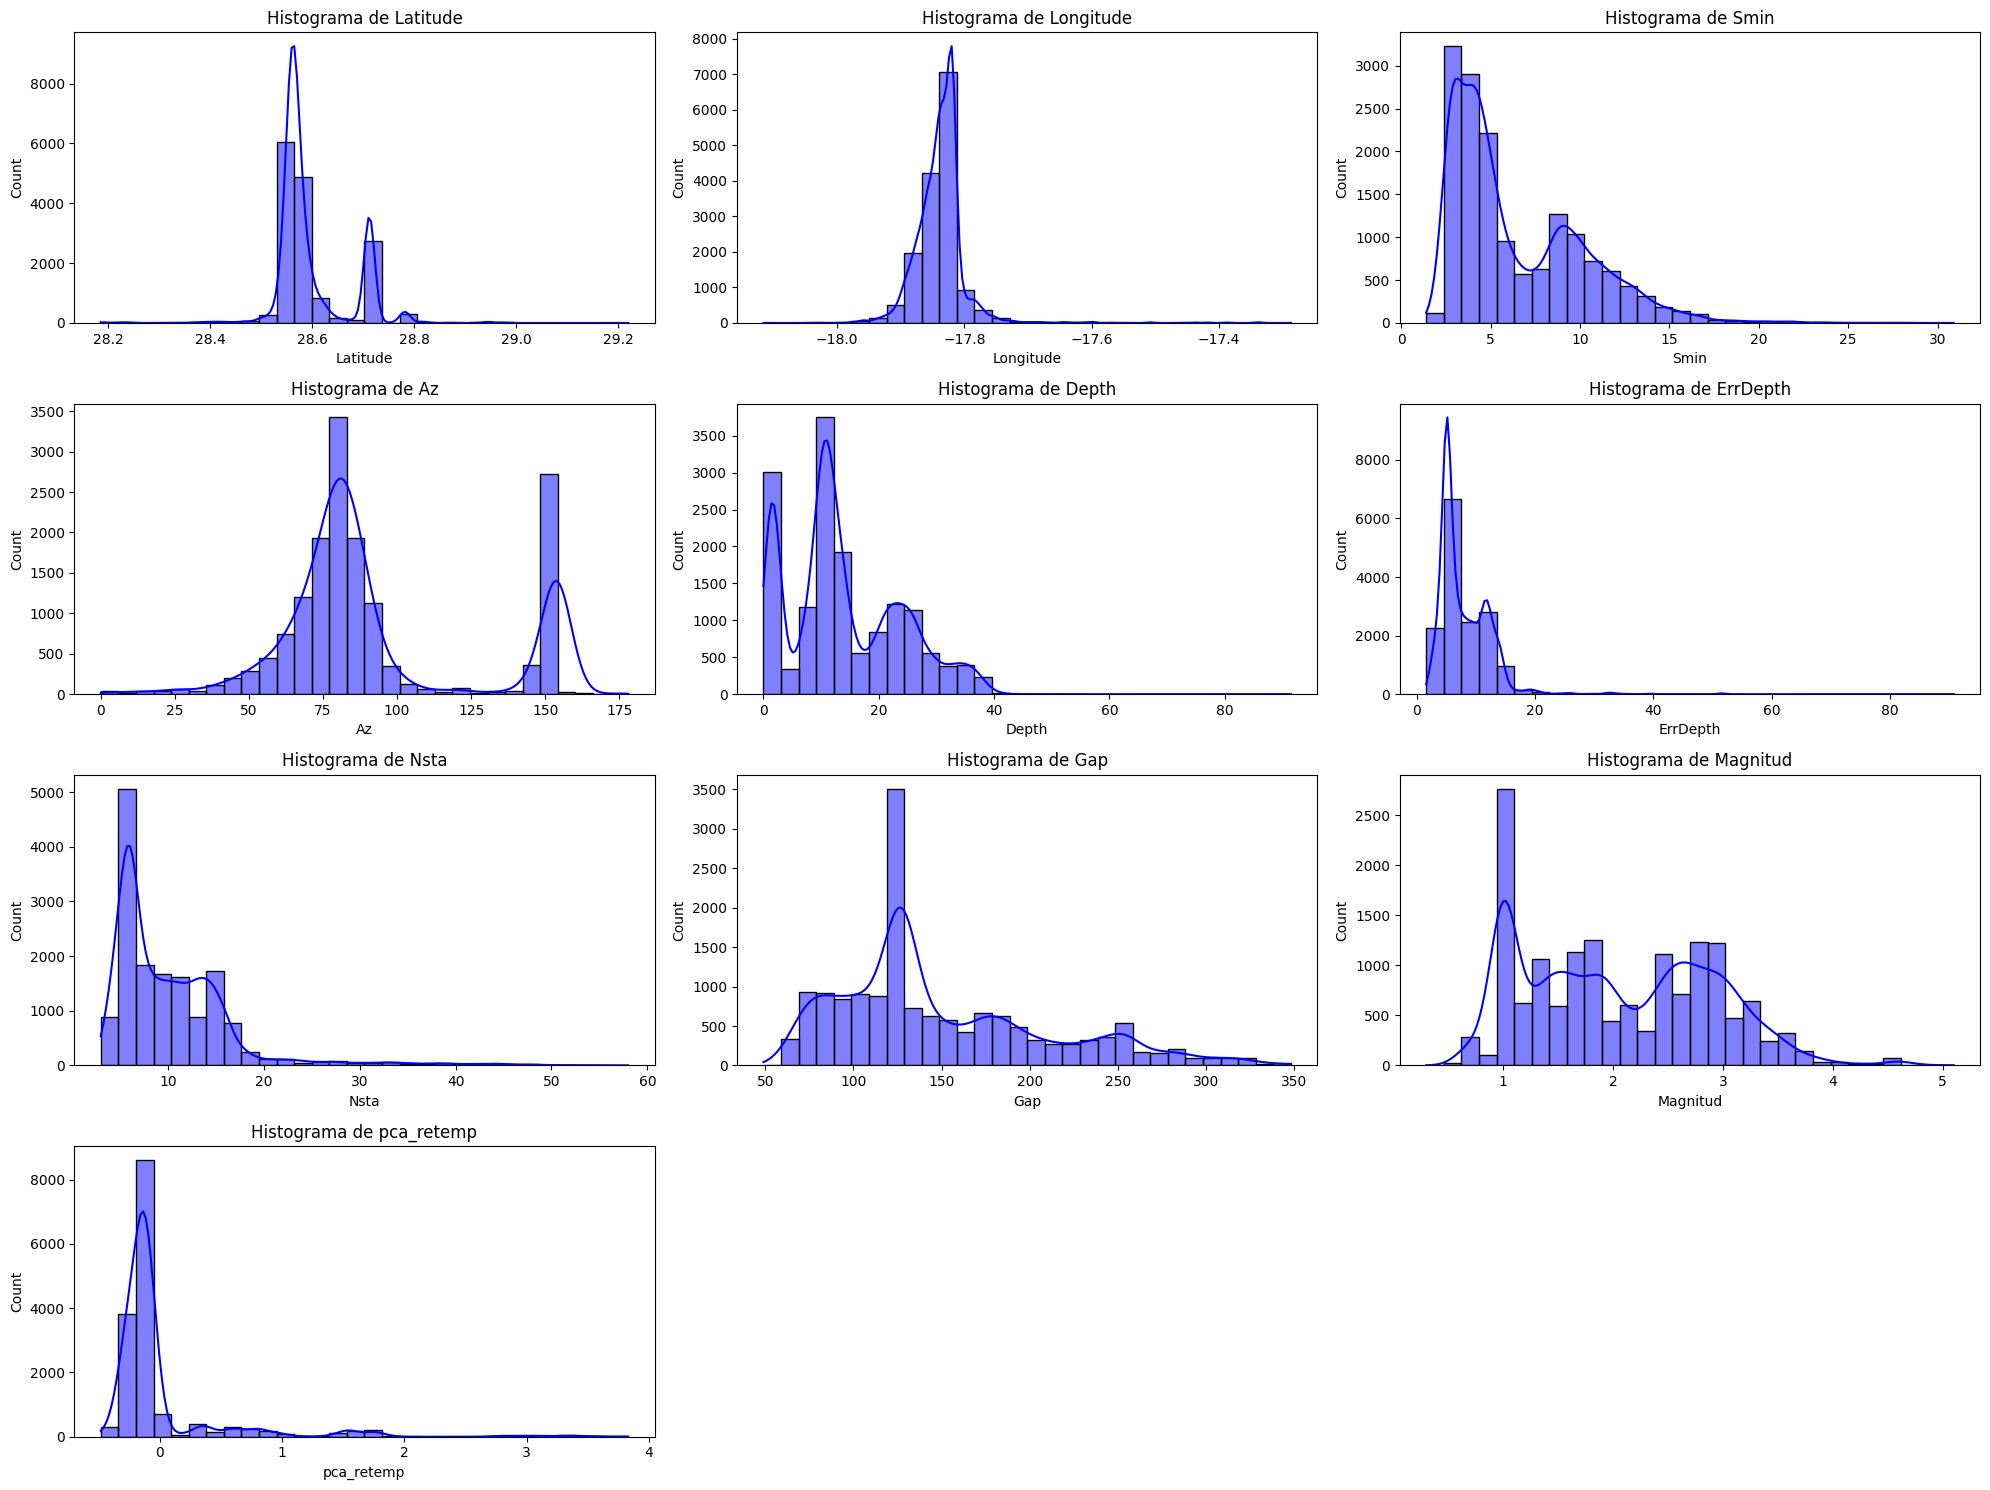

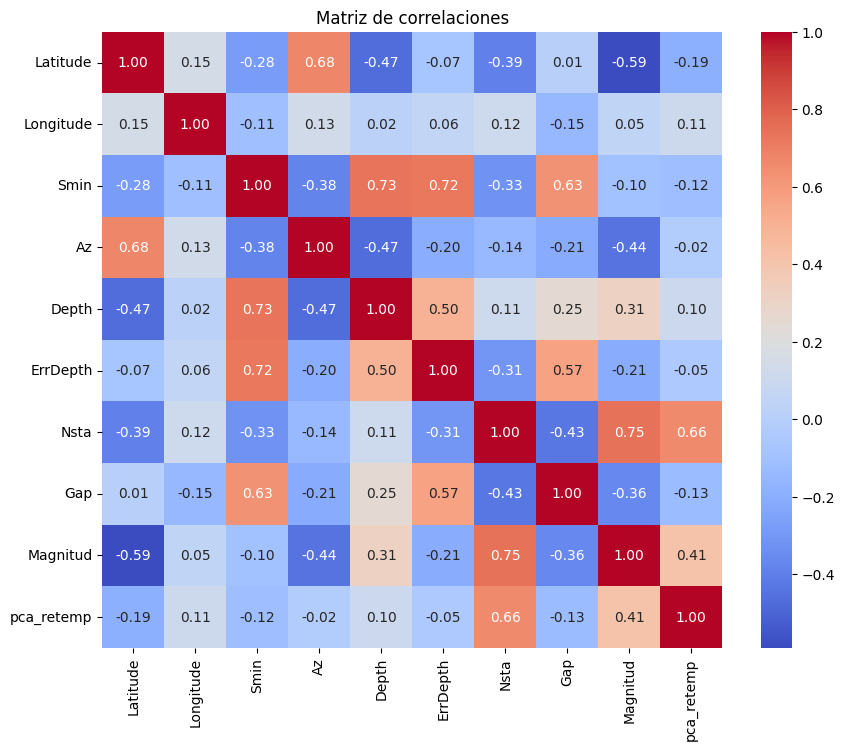

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

# Cargar el archivo (reemplaza con tu ruta local si es necesario)
file_path = "Datos_Resultantes.csv"  # Asegúrate de que el archivo esté en el mismo directorio
data = pd.read_csv(file_path)

# Mostrar las primeras filas para entender los datos
print("Primeras filas del dataset:")
print(data.head())

# Estadísticas descriptivas básicas y avanzadas
descriptive_stats = data.describe().T
descriptive_stats['skewness'] = data.apply(skew)
descriptive_stats['kurtosis'] = data.apply(kurtosis)

print("\nEstadísticas descriptivas avanzadas:")
print(descriptive_stats)

# Identificar valores atípicos usando IQR
outliers_summary = {}
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_summary[col] = len(outliers)

# Resumen de valores atípicos
outliers_summary_df = pd.DataFrame(list(outliers_summary.items()), columns=['Variable', 'Outliers'])
outliers_summary_df = outliers_summary_df.sort_values(by='Outliers', ascending=False)

print("\nResumen de valores atípicos:")
print(outliers_summary_df)

# Visualización de boxplots para observar valores atípicos
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[col], palette="viridis")
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.ylabel(col, fontsize=10)
plt.tight_layout()
plt.show()

# Visualización de histogramas para observar distribuciones
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True, color="blue", bins=30)
    plt.title(f"Histograma de {col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
plt.tight_layout()
plt.show()

# Correlaciones entre las variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlaciones")
plt.show()
